# **Project Name**    - Gender Classification Model



##### **Project Type**    - Productionization of ML Systems
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone_Project_Productionization_of_ML_Systems.git

# Project Title:
**Voyage Analytics: Integrating MLOps in Travel
Productionization of ML Systems**



## Business Context

In the realm of travel and tourism, the intersection of data analytics and machine learning presents an opportunity to revolutionize the way travel experiences are curated and delivered. This capstone project revolves around a trio of datasets - users, flights, and hotels - each providing a unique perspective on travel patterns and preferences. The goal is to leverage these datasets to build and deploy sophisticated machine learning models, serving a dual purpose: enhancing predictive capabilities in travel-related decision-making and mastering the art of MLOps through hands-on application.

## Brief overview of each datasets
#### **Users Dataset:**
- code: User identifier.
- company: Associated company.
- name: Name of the user.
- gender: Gender of the user.
- age: Age of the user.

#### **Flights Dataset:**
- travelCode: Identifier for the travel.
- userCode: User identifier(linked to the Users dataset)
- from: Origin of the flight.
- to: Destination of the flight.
- flightType: Type of flight (e.g., first class).
- price: Price of the flight.
- time: Flight duration.
- distance: Distance of the flight.
- agency: Flight agency.
- date: Date of the flight.

#### **Hotels Dataset:**
- travelCode: Identifier for the travel, similar to the Flights dataset.
- userCode: User identifier(linked to the Users dataset)
- name: Name of the hotel.
- place: Location of the hotel.
- days: Number of days of the hotel stay.
- price: Price per day.
- total: Total price for the stay.
- date: Date of the hotel booking.

## Project Objectives
Deploy a classification model to categorize a user's gender.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/"

!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/AB/spec/M1/project/travel_capstone.zip
  inflating: flights.csv             
  inflating: hotels.csv              
  inflating: users.csv               


In [3]:
# Load Dataset
users_dataset = pd.read_csv("/content/users.csv")

### Dataset First View

In [4]:
# Dataset First Look
users_dataset.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [5]:
users_dataset.tail()

,code,company,name,gender,age
1335,1335,Umbrella LTDA,Albert Garroutte,male,23
1336,1336,Umbrella LTDA,Kim Shores,female,40
1337,1337,Umbrella LTDA,James Gimenez,male,28
1338,1338,Umbrella LTDA,Viola Agosta,female,52
1339,1339,Umbrella LTDA,Paul Rodriguez,male,35


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"Total number of rows: {users_dataset.shape[0]}")
print(f"Total number of columns: {users_dataset.shape[1]}")

Total number of rows: 1340
Total number of columns: 5


### Dataset Information

In [7]:
# Dataset Info
users_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
users_dataset.duplicated().value_counts()

,count
False,1340


In this dataset not present any duplicate row.


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
users_dataset.isna().sum()

,0
code,0
company,0
name,0
gender,0
age,0


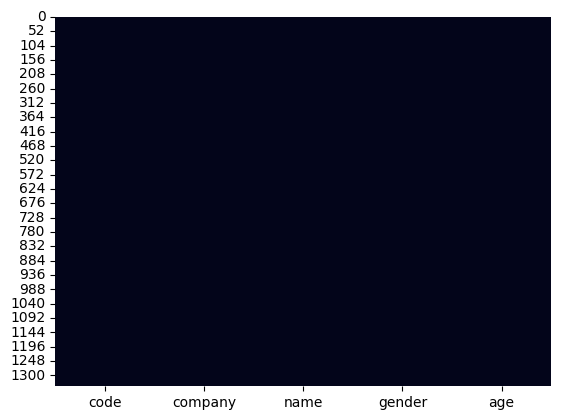

In [10]:
# Visualizing the missing values
sns.heatmap(users_dataset.isna(), cbar=False)
plt.show()

### What did you know about your dataset?

This dataset contains no duplicate rows and no missing values.  

**Dataset Summary:**  
- **Total Rows:** 1340
- **Total Columns:** 5

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
print(f"Dataset all columns name: {list(users_dataset.columns)} \n")
users_dataset.info()

Dataset all columns name: ['code', 'company', 'name', 'gender', 'age'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [12]:
# Dataset Describe
users_dataset.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


In [13]:
users_dataset.describe(include=['object'])

,company,name,gender
count,1340,1340,1340
unique,5,1338,3
top,4You,Charlotte Johnson,male
freq,453,2,452


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
users_dataset.nunique()

,0
code,1340
company,5
name,1338
gender,3
age,45


In [15]:
# Unique Values for ['company','gender'] variable
column_list = ['company','gender']
for column_name in column_list:
  print(f"the unique values from column_name:'{column_name}' is \n {users_dataset[column_name].unique()} \n")

the unique values from column_name:'company' is 
 ['4You' 'Monsters CYA' 'Wonka Company' 'Acme Factory' 'Umbrella LTDA'] 

the unique values from column_name:'gender' is 
 ['male' 'female' 'none'] 



In [16]:
users_dataset['company'].value_counts(normalize=True)

,proportion
company,
4You,0.338060
Acme Factory,0.194776
Wonka Company,0.176866
Monsters CYA,0.145522
Umbrella LTDA,0.144776


In [17]:
users_dataset['gender'].value_counts(normalize=True)

,proportion
gender,
male,0.337313
female,0.334328
none,0.328358
